In [1]:

import pandas as pd
from datetime import datetime

df = pd.read_csv('AAPL.csv')
df.head()


,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [2]:
df.info


<bound method DataFrame.info of       Unnamed: 0 symbol                       date    close     high  \
0              0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260   
1              1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950   
2              2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450   
3              3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390   
4              4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655   
...          ...    ...                        ...      ...      ...   
1253        1253   AAPL  2020-05-18 00:00:00+00:00  314.960  316.500   
1254        1254   AAPL  2020-05-19 00:00:00+00:00  313.140  318.520   
1255        1255   AAPL  2020-05-20 00:00:00+00:00  319.230  319.520   
1256        1256   AAPL  2020-05-21 00:00:00+00:00  316.850  320.890   
1257        1257   AAPL  2020-05-22 00:00:00+00:00  318.890  319.230   

           low    open    volume    adjClose     adjHigh      adjLow  \
0     130.0500  130.34  4583324

In [3]:

df['date'] = pd.to_datetime(df['date'])

# extracting the min and max values

min_date = df['date'].min().strftime('%Y-%m-%d')
max_date = df['date'].max().strftime('%Y-%m-%d')

# Print the information
print(f"Dataframe contains Apple Stock price from {min_date} to {max_date}")


Dataframe contains Apple Stock price from 2015-05-27 to 2020-05-22


In [4]:
df1= df.reset_index()['close']
df1.shape

(1258,)

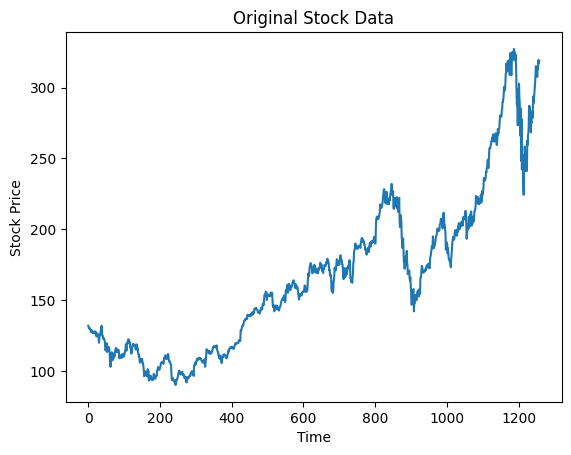

In [61]:
import matplotlib.pyplot as plt

plt.plot(df1)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Original Stock Data')

plt.show()


In [7]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [9]:
training_size,test_size


(817, 441)

In [10]:
# convert an array of values into a dataset matrix

import numpy as np

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - time_step):
        dataX.append(dataset[i:i+time_step])
        dataY.append(dataset[i+time_step])
    
    return np.array(dataX), np.array(dataY)



time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(717, 100, 1)
(717, 1)
(341, 100, 1)
(341, 1)


In [11]:
# creating LSTM model for prediction

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(100, 1)),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 19s 585ms/step - loss: 0.0217 - val_loss: 0.0444
Epoch 2/100
12/12 [==============================] - 4s 361ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 3/100
12/12 [==============================] - 4s 350ms/step - loss: 0.0014 - val_loss: 0.0040
Epoch 4/100
12/12 [==============================] - 4s 348ms/step - loss: 7.4392e-04 - val_loss: 0.0037
Epoch 5/100
12/12 [==============================] - 4s 342ms/step - loss: 6.2081e-04 - val_loss: 0.0038
Epoch 6/100
12/12 [==============================] - 4s 347ms/step - loss: 6.2039e-04 - val_loss: 0.0035
Epoch 7/100
12/12 [==============================] - 4s 345ms/step - loss: 5.8523e-04 - val_loss: 0.0035
Epoch 8/100
12/12 [==============================] - 4s 334ms/step - loss: 5.6769e-04 - val_loss: 0.0034
Epoch 9/100
12/12 [==============================] - 4s 344ms/step - loss: 5.6166e-04 - val_loss: 0.0033
Epoch 10/100
12/12 [==============================] - 4s 344ms/ste

In [14]:
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

# Perform predictions on the training and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# rescaling the prediction
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculating the  root mean squared value for train & test data
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))

test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))


11/11 [==============================] - 1s 65ms/step


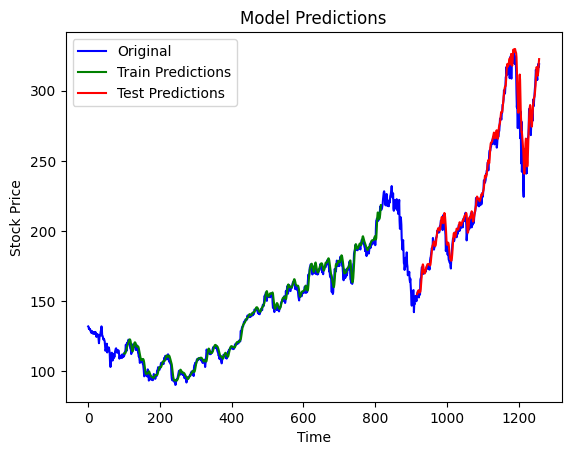

In [63]:
import numpy as np
import matplotlib.pyplot as plt

look_back = 100

# Plot the original data
plt.plot(scaler.inverse_transform(df2), color='blue', label='Original')

# Create empty arrays for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan

# Set the ranges for plotting
trainPredictPlot[look_back:look_back+len(train_predict)] = train_predict
testPredictPlot[len(train_predict)+(look_back*2):len(train_predict)+(look_back*2)+len(test_predict)] = test_predict

# Plot baseline and predictions
plt.plot(trainPredictPlot, color='green', label='Train Predictions')
plt.plot(testPredictPlot, color='red', label='Test Predictions')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Model Predictions')

# Show the legend
plt.legend()

# Display the plot
plt.show()


In [27]:
len(test_data)

441

In [28]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [30]:
len_test_data = len(test_data)

# Reshapingbtest data
x_input = test_data[341:].reshape(1, -1)
x_input_shape = x_input.shape

# Converting x_input to a list
temp_input = x_input.flatten().tolist()


In [32]:
# temp_input

In [51]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.66452757 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292
 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543 0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211
 0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.9563033  0.96491598 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 1.0132978
 1.02216935 1.0365113  1.05241919 1.0675956  1.08108354 1.0927006
 1.10266674 1.11139178 1.11933756 1.12691605 1.13442433 1.14202046
 1.14973402 1.15750539 1.16523039 1.17280293 1.180143

7 day output [[1.2911869]]
8 day input [0.74191506 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707
 0.8125475  0.78776492 0.75162543 0.78426074 0.77974331 0.81326522
 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883 0.85628641
 0.87486279 0.88782403 0.90095415 0.92793211 0.948535   0.93333615
 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143
 0.9563033  0.96491598 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 1.0132978  1.02216935 1.0365113
 1.05241919 1.0675956  1.08108354 1.0927006  1.10266674 1.11139178
 1.11933756 1.12691605 1.13442433 1.14202046 1.14973402 1.15750539
 1.16523039 1.17280293 1.18014371 1.18721306 1.19401228 1.20057166
 1.20693922 1.21316493 1.

15 day output [[1.3262006]]
16 day input [0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.93333615 0.91746179 0.92544119
 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 1.0132978  1.02216935 1.0365113  1.05241919 1.0675956
 1.08108354 1.0927006  1.10266674 1.11139178 1.11933756 1.12691605
 1.13442433 1.14202046 1.14973402 1.15750539 1.16523039 1.17280293
 1.18014371 1.18721306 1.19401228 1.20057166 1.20693922 1.21316493
 1.21929061 1.2253449  1.23133993 1.23727524 1.24314117 1.24892414
 1.25460947 1.26018643

23 day output [[1.3543286]]
24 day input [0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211
 0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.9563033  0.96491598 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808
 0.98620808 0.98620808 0.98620808 0.98620808 0.98620808 1.0132978
 1.02216935 1.0365113  1.05241919 1.0675956  1.08108354 1.0927006
 1.10266674 1.11139178 1.11933756 1.12691605 1.13442433 1.14202046
 1.14973402 1.15750539 1.16523039 1.17280293 1.18014371 1.18721306
 1.19401228 1.20057166 1.20693922 1.21316493 1.21929061 1.2253449
 1.23133993 1.23727524 1.24314117 1.24892414 1.25460947 1.26018643
 1.26564777 1.27098989 1.27621305 1.28131902 1.28630936 1.29118693
 1.29595339 1.30060875 1.

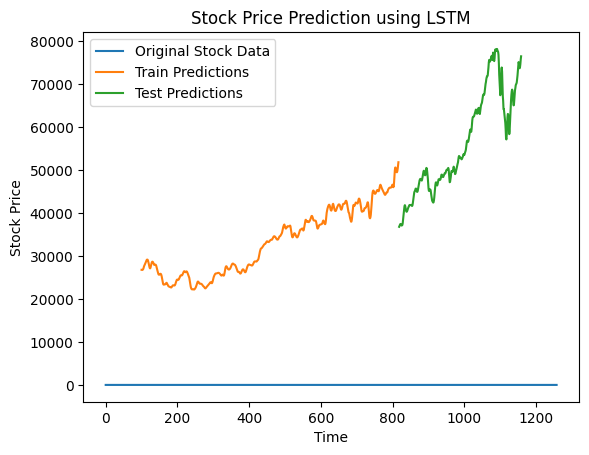

In [65]:
import matplotlib.pyplot as plt

# Plot the original data
plt.plot(df2, label='Original Stock Data')

# Set the ranges for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan

# Set the ranges for train and test predictions
trainPredictPlot[look_back:look_back+len(train_predict)] = scaler.inverse_transform(train_predict)
testPredictPlot[look_back+len(train_predict)+1:look_back+len(train_predict)+1+len(test_predict)] = scaler.inverse_transform(test_predict)

# Plot the train and test predictions
plt.plot(trainPredictPlot, label='Train Predictions')
plt.plot(testPredictPlot, label='Test Predictions')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')

# Show the legend
plt.legend()

# Display the plot
plt.show()


In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


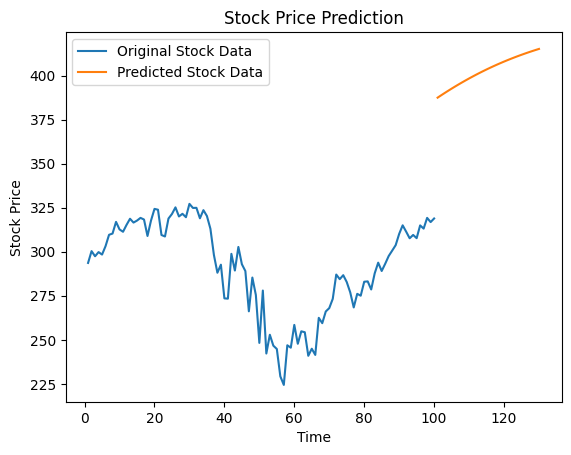

In [68]:
import matplotlib.pyplot as plt

# Plot the original data
plt.plot(day_new, scaler.inverse_transform(df2[1158:]), label='Original Stock Data')

# Plot the predicted data
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Predicted Stock Data')

# Add a title to the graph
plt.title('Stock Price Prediction')

# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Display the legend
plt.legend()

# Show the plot
plt.show()


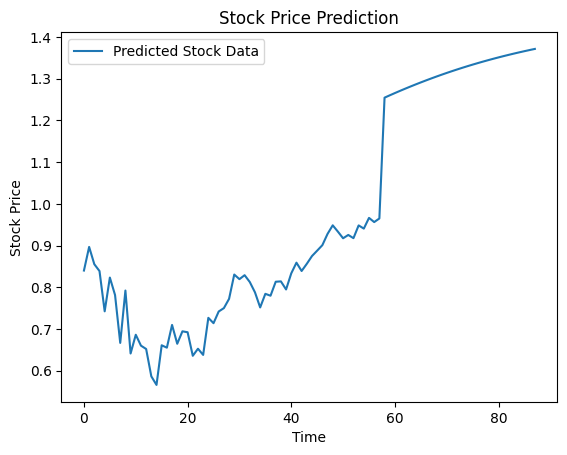

In [69]:
df3 = df2.tolist()
df3.extend(lst_output)


plt.plot(df3[1200:], label='Predicted Stock Data')

plt.title('Stock Price Prediction')

plt.xlabel('Time')
plt.ylabel('Stock Price')

plt.legend()

plt.show()


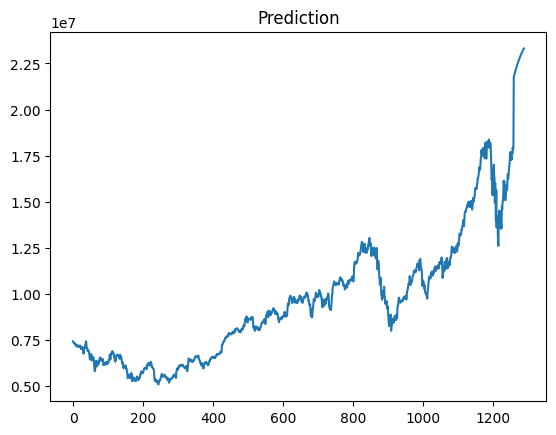

In [72]:
df3 = scaler.inverse_transform(df3).tolist()


plt.plot(df3)

plt.title('Prediction')


plt.show()


In [73]:
##The outcome of the project is a trained LSTM model that can make predictions on stock prices. 
##The model's performance can be evaluated using metrics such as root mean squared error (RMSE). 
##The predicted stock prices can be compared to the actual prices to assess the accuracy of the model.
##Additionally, visualizations can be created to observe the trends and patterns in the predicted and actual stock prices. 
##The outcome of the project can provide insights into the potential future movements of the stock market.